In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 서울시에서 일어나는 범죄와 체감 안전도
: 강남 3구의 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지를 확인

In [3]:
crime_anal_police = pd.read_csv('../Data/crime_in_Seoul.csv', encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [4]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [5]:
# 경찰서 위치 정보
police_address = pd.read_csv('../Data/SeoulPoliceAddress.csv')
police_address.head()


,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


crime_anal_police 의 관서명을 police_address 의 경찰관서와 일치 시키기   
중부서 -> 서울중부경찰서

In [6]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울'+name[:-1]+'경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [7]:
# 다른방식
station_name = list("서울"+crime_anal_police['관서명'].str[:-1]+"경찰서")
# station_name = list("서울"+crime_anal_police['관서명'][:-1]+"경찰서") ##<<< 이거는 1개가 빠짐 !! 이거 쓰면 안되는데 왜  빠지는지 나중에 확인해보기
station_name #  

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [8]:
len(station_name) == len(police_address) # < ???? False?

True

In [9]:
print(len(station_name))
print(len(police_address))

31
31


### 경찰서의 위도 경도 수집하기

In [10]:
import urllib.request
import json    
lngList=[]
latList=[]
errorList=[]
count = 1

client_id = "t04w353lqg"
client_secret = "p7vRKX2OWhlZ7P352E2JR8NGirsle1Qak36cXm0P"

for address in police_address['주소']:
    encText = urllib.parse.quote(address)
    try:
        url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # json 결과
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
        request.add_header("X-NCP-APIGW-API-KEY",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            entext = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)
        data1 = json.loads(entext)
        lng = data1['addresses'][0]['x']
        lat = data1['addresses'][0]['y']
        lngList.append(lng)
        latList.append(lat)
    except: 
        if address == '서울 성북구 종암로 135':
            print('여기 걸렸음 <<<<<<<<<<')
            lng = 127.032231
            lat = 37.602018
            lngList.append(lng)
            latList.append(lat)
        else:
            errorList.append(f'{count} : Error Address : {address}')
            lng = 'Error'
            lat = 'Error'
            lngList.append(lng)
            latList.append(lat)
    else:
        count += 1

    

여기 걸렸음 <<<<<<<<<<


In [11]:
police_address['lng'] = pd.Series(lngList)
police_address['lat'] = pd.Series(latList)

In [12]:
police_address

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,126.9677732,37.5412134
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,127.0160835,37.5899114
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,127.0457643,37.5851004
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,126.9539447,37.5510175
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,126.9009426,37.5258476


In [13]:
police_address.to_csv('../Data/SeoulPoliceAddress_latlng.csv', index=False)

### 경찰서의 주소중 구이름만 추출하기

In [14]:
[region.split()[1] for region in police_address['주소']]

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [15]:
crime_anal_police['구별'] = [region.split()[1] for region in police_address['주소']]
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


> 서울시 구는 25개 구로 되어 있는데 23개 구만 보임   
> 서울시 구는 25개 구로 되어 있는데 경찰서 수가 31개

In [16]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [17]:
# 구별을 주소로 추가해놔서 안맞는 부분이 있음
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 금천서는 금천구로 편성 

# crime_anal_police[crime_anal_police['관서명']=='금천서']
crime_anal_police.loc[crime_anal_police['관서명']=='금천서',['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",금천구


In [18]:
# 강서서가 양천구로 되어 있는데 강서구로 편성
crime_anal_police[crime_anal_police['관서명']=='강서서']
crime_anal_police.loc[crime_anal_police['관서명']=='강서서',['구별']] = '강서구'
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",강서구


In [19]:
print(len(crime_anal_police['구별'].unique()))
print(len(crime_anal_police))

25
31


In [20]:
# 절도,폭별 발생 / 절도,폭력 검거 를 int type으로 변환
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(",","").astype(int)
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(",","").astype(int)
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(",","").astype(int)
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(",","").astype(int)

In [21]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [22]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [23]:
# 구별로 데이터를 정리 
crime_anal = pd.pivot_table(crime_anal_police, index='구별', aggfunc=sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [24]:
# 각 범죄별 검거율 구하기
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,살인검거율,강도검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,76.923077,85.714286,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,75.000000,133.333333,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,114.285714,92.857143,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,114.285714,100.000000,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,88.888889,116.666667,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,100.000000,185.714286,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,75.000000,73.333333,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,133.333333,100.000000,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [25]:
# 검거 건수는 제거
del crime_anal['강간 검거']
del crime_anal['살인 검거']
del crime_anal['강도 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,살인검거율,강도검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,76.923077,85.714286,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,75.000000,133.333333,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,114.285714,92.857143,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,114.285714,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,88.888889,116.666667,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,185.714286,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,75.000000,73.333333,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,133.333333,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [26]:
# 검거율이 100% 넘는 경에는 나중에 계산할때 머리 아파지니까 100으로 변경
crime_anal[crime_anal.iloc[:,5:] > 100] = 100
crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,살인검거율,강도검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,76.923077,85.714286,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,75.000000,100.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,100.000000,92.857143,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,88.888889,100.000000,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,75.000000,73.333333,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [27]:
# change Column name
crime_anal.rename(columns={
    '강간 발생' : '강간',
    '강도 발생' :'강도',
    '살인 발생' :'살인',
    '절도 발생' :'절도',
    '폭력 발생' :'폭력',
    }, inplace=True
)

### 데이터의 정규화(Normalization)
- 강도와 살인은 2자릿수 이나 절도와 폭력은 4자리로 차이가 많이 남
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리함
- 각 항목의 값을 최대 1로 계산한다(비중)

In [28]:
# MachineLearning Module
# sklearn 의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행

from sklearn import preprocessing

In [29]:
# !pip install scikit-learn

In [30]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [31]:
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [32]:
# 최대값과 최소값 가져오기 
min_max_scaler = preprocessing.MinMaxScaler()

In [33]:
# float으로 해줘야 계산이 됨 
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [34]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [35]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV data merge
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [36]:
result_CCTV = pd.read_csv('../Data/CCTV_result.csv', index_col='구별')
result_CCTV.head(4)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.411122,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


In [37]:
del result_CCTV['오차']
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head(4)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617


In [38]:
# 범죄 발생건구를 합하여 범죄컬럼 생성
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = (crime_anal_norm[col].sum(axis=1))


In [39]:
# numpy로 하는 방법
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)

In [40]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581,2.204979,416.915211
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227,2.603930,325.647079
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634,0.666924,423.928929
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906,1.905445,383.477292


---
### Seaborn 을 활용한 시각화

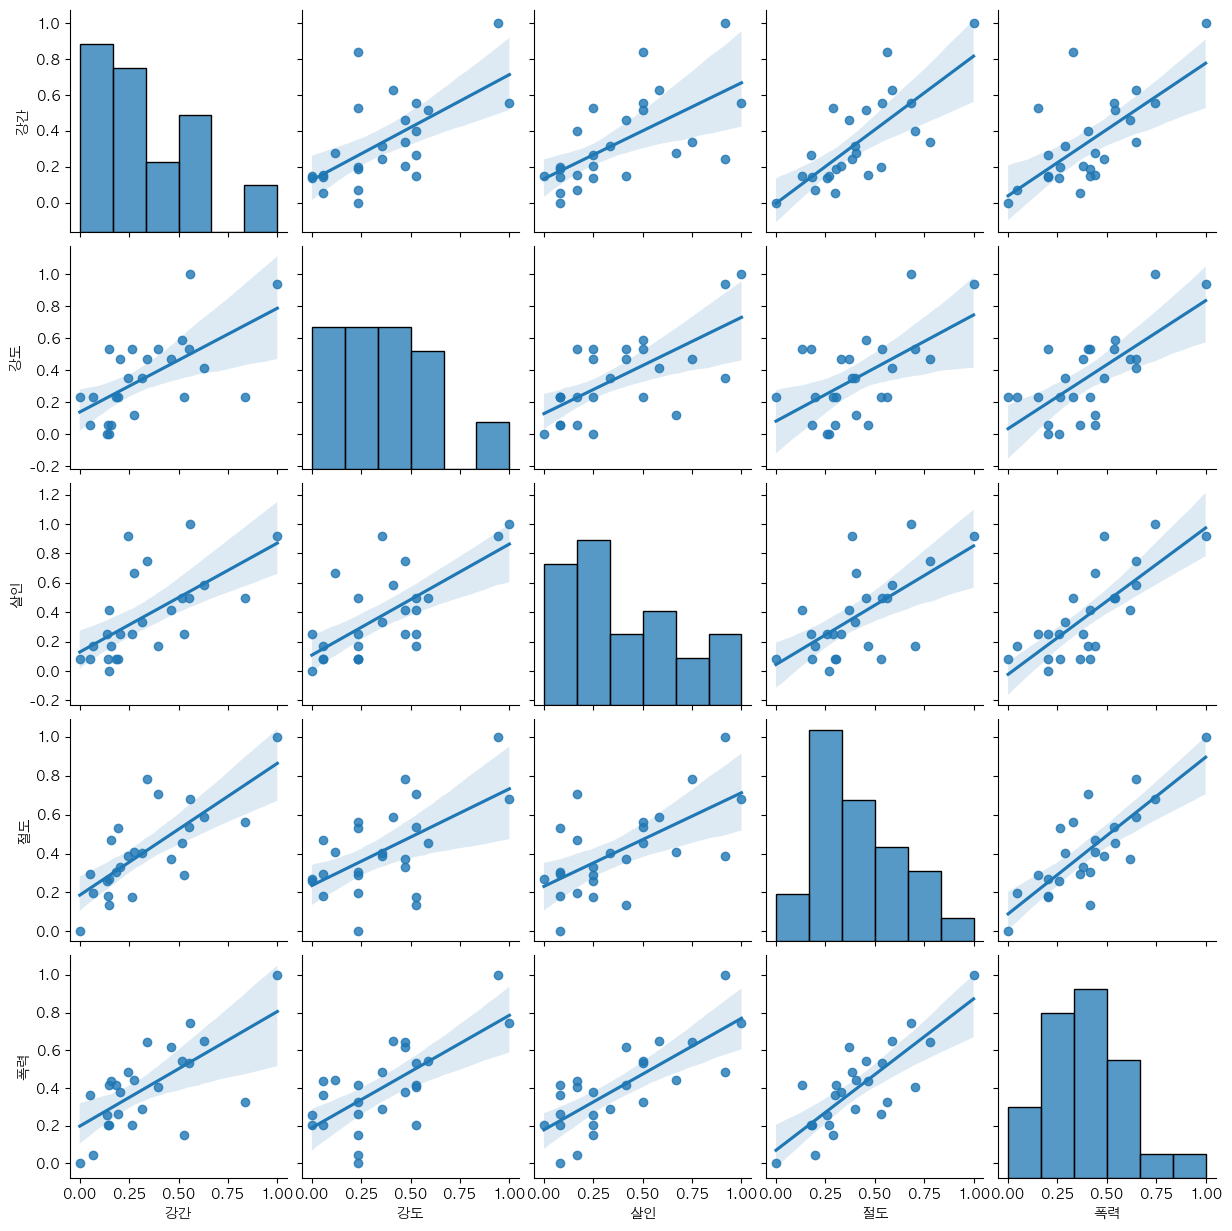

In [41]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화

sns.pairplot(
    crime_anal_norm,
    vars = ['강간','강도','살인','절도','폭력'],
    kind = 'reg'
)

plt.show()

### CCTV와 살인 강도에 대한 그래프

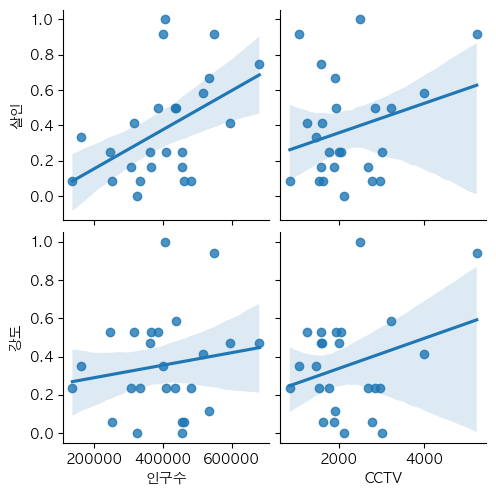

In [42]:
sns.pairplot(
    crime_anal_norm,
    x_vars = ['인구수','CCTV'],
    y_vars = ['살인','강도'],
    kind='reg'
)
plt.show()

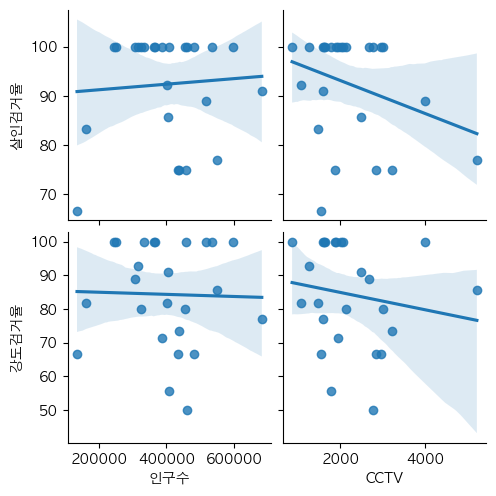

In [43]:
# 검거율은 어떨까?

sns.pairplot(
    crime_anal_norm,
    x_vars = ['인구수','CCTV'],
    y_vars = ['살인검거율','강도검거율'],
    kind='reg'
)
plt.show()

## CCTV는 검거 건수가 줄어들어, 검거'율'이 떨어지는거임, CCTV가 많아질수록 검거'율'이 떨어지는게 아님
# 해석을 잘 해야댐 

### heatmap을 이용한 전체 검거율 확인

In [44]:
# 검거 최대값 가져오기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head(4)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152


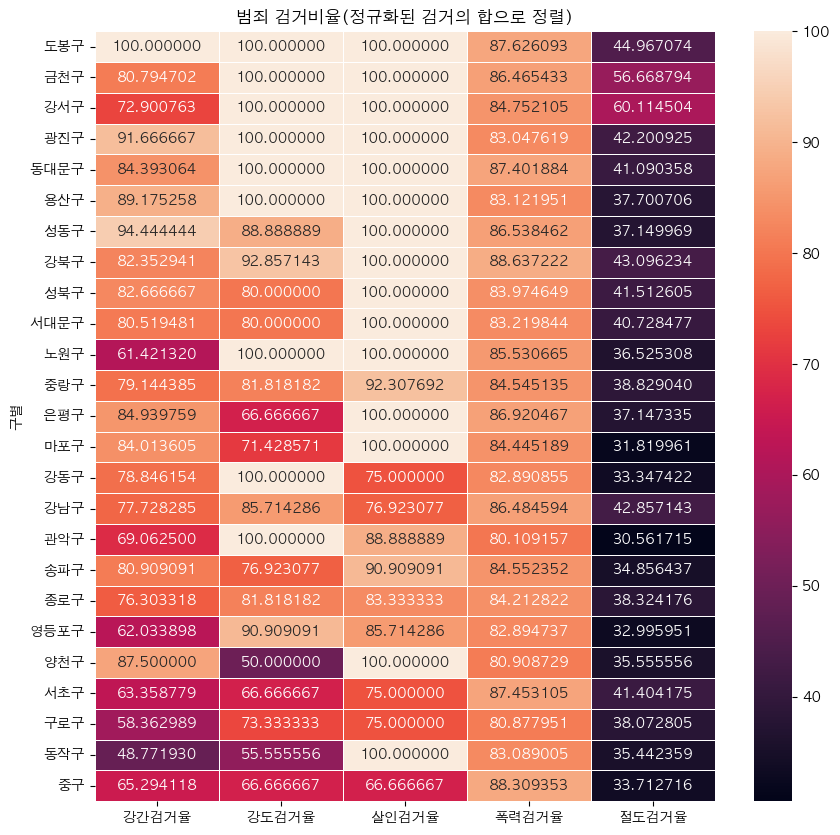

In [45]:
target_col = ['강간검거율','강도검거율','살인검거율','폭력검거율','절도검거율']
plt.figure(figsize=(10,10))

sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot = True, # True해야 숫자 보임
    fmt = 'f', #float으로 볼꺼임
    linewidths = 0.5
)

plt.title('범죄 검거비율(정규화된 검거의 합으로 정렬)')
plt.show()

# 지도 출력

In [46]:
geo_path = '../Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [47]:
# 살인
map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Terrain', 
    zoom_start = 12
    )
folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm_sort,
    columns = [crime_anal_norm_sort.index, '살인'],
    fill_color = 'PuRd',
    fill = True,
    key_on = 'feature.id',
).add_to(map)

map

In [48]:
#강간

map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Terrain', 
    zoom_start = 12
    )
folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm_sort,
    columns = [crime_anal_norm_sort.index, '강간'],
    fill_color = 'PuRd',
    fill = True,
    key_on = 'feature.id',
).add_to(map)

map

In [49]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 10000 => 10만명당 범죄 발생 비율 
milion = pd.DataFrame(crime_anal_norm_sort['범죄'] / crime_anal_norm_sort['인구수'] * 100000)
milion.columns = ['범죄율']

map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Terrain', 
    zoom_start = 12
    )
folium.Choropleth(
    geo_data = geo_str,
    data = milion,
    columns = [milion.index, '범죄율'],
    fill_color = 'PuRd',
    fill = True,
    key_on = 'feature.id',
).add_to(map)

map


In [50]:
milion.sort_values(by='범죄율', ascending=False)


,범죄율
구별,
종로구,1.043798
영등포구,0.984206
중구,0.960599
강남구,0.883408
마포구,0.687134
광진구,0.602470
중랑구,0.595352
구로구,0.594087
용산구,0.578100


In [51]:
# 마커는 경찰서 위치
# 파란색 동그라미는 검거율
# 색갈은 범죄 발생 건수 ( 범죄 )

# 5대 범죄 통합

map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Terrain', 
    zoom_start = 12
    )

#범죄 영역
folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm_sort,
    columns = [crime_anal_norm_sort.index, '범죄'],
    fill_color = 'PuRd',
    fill = True,
    key_on = 'feature.id',
).add_to(map)


for name, lat, lng in zip(police_address.경찰관서, police_address.lat, police_address.lng):
    try:
        folium.Marker([lat, lng], popup = name,tooltip=name, icon=folium.Icon(color = 'blue')).add_to(map)
        folium.CircleMarker([lat, lng],
                            radius = round(crime_anal_norm_sort['검거']),#*100
                            color = 'brown',
                            fill = True,
                            fill_color = 'skyblue',
                            fill_opacity = 0.7,
                            popup = name).add_to(map)
    except:print(f'Marker {name} error')


# # 검거
# for lat, lng in zip(police_address.lat, police_address.lng):
#     try:
#         folium.CircleMarker([lat, lng],
#                             radius = round(crime_anal_norm_sort.검거),#*100
#                             color = 'brown',
#                             fill = True,
#                             fill_color = 'skyblue',
#                             fill_opacity = 0.7,
#                             popup = name).add_to(map)
#     except:print(f'Circle Marker {name} error')



map

Marker 서울중부경찰서 error
Marker 서울종로경찰서 error
Marker 서울남대문경찰서 error
Marker 서울서대문경찰서 error
Marker 서울혜화경찰서 error
Marker 서울용산경찰서 error
Marker 서울성북경찰서 error
Marker 서울동대문경찰서 error
Marker 서울마포경찰서 error
Marker 서울영등포경찰서 error
Marker 서울성동경찰서 error
Marker 서울동작경찰서 error
Marker 서울광진경찰서 error
Marker 서울서부경찰서 error
Marker 서울강북경찰서 error
Marker 서울금천경찰서 error
Marker 서울중랑경찰서 error
Marker 서울강남경찰서 error
Marker 서울관악경찰서 error
Marker 서울강서경찰서 error
Marker 서울강동경찰서 error
Marker 서울종암경찰서 error
Marker 서울구로경찰서 error
Marker 서울서초경찰서 error
Marker 서울양천경찰서 error
Marker 서울송파경찰서 error
Marker 서울노원경찰서 error
Marker 서울방배경찰서 error
Marker 서울은평경찰서 error
Marker 서울도봉경찰서 error
Marker 서울수서경찰서 error


In [58]:

map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Terrain', 
    zoom_start = 12
    )

for well, lat, lng in zip(crime_anal_norm_sort['검거'], police_address.lat, police_address.lng):
    try:
        folium.CircleMarker([well,lat, lng],
                            radius = 20,
                            color = 'brown',
                            fill = True,
                            fill_color = 'skyblue',
                            fill_opacity = 0.7,
                            popup = well).add_to(map)
    except:print(f'CircleMarkerMarker {well} error')



CircleMarkerMarker 4.32593167122272 error
CircleMarkerMarker 4.239289291612752 error
CircleMarkerMarker 4.177673719463864 error
CircleMarkerMarker 4.169152110282314 error
CircleMarkerMarker 4.128853058191163 error
CircleMarkerMarker 4.099979154383046 error
CircleMarkerMarker 4.07021763757918 error
CircleMarkerMarker 4.069435399362908 error
CircleMarkerMarker 3.8815392087120046 error
CircleMarkerMarker 3.844678016986492 error
CircleMarkerMarker 3.834772923025345 error
CircleMarkerMarker 3.7664443419532527 error
CircleMarkerMarker 3.7567422852141017 error
CircleMarkerMarker 3.717073271384427 error
CircleMarkerMarker 3.7008443111234124 error
CircleMarkerMarker 3.697073844099915 error
CircleMarkerMarker 3.6862226066183292 error
CircleMarkerMarker 3.681500479617838 error
CircleMarkerMarker 3.639918301422871 error
CircleMarkerMarker 3.545479631875707 error
CircleMarkerMarker 3.539642841326779 error
CircleMarkerMarker 3.3388272532628447 error
CircleMarkerMarker 3.256470792429876 error
CircleM

In [78]:
police_address['검거'] = 1
# police_address['검거'] = crime_anal_norm[['검거']]
police_address

,경찰관서,전화번호,FAX,주소,lng,lat,검거
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144,1
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322,1
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186,1
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018,1
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764,1
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,126.9677732,37.5412134,1
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,127.0160835,37.5899114,1
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,127.0457643,37.5851004,1
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,126.9539447,37.5510175,1
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,126.9009426,37.5258476,1
